In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")
#warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='once')

from subprocess import check_output
print(check_output(["dir", "input"], shell=True).decode("utf8"))

 Volume in drive C is Windows
 Volume Serial Number is F8E3-FF19

 Directory of C:\Users\uttam\Documents\DataScience\input

10/17/2018  06:59 PM    <DIR>          .
10/17/2018  06:59 PM    <DIR>          ..
10/17/2018  06:58 PM             3,258 gender_submission.csv
10/17/2018  06:58 PM            28,629 test.csv
10/17/2018  06:58 PM            61,194 train.csv
               3 File(s)         93,081 bytes
               2 Dir(s)  47,767,093,248 bytes free



In [2]:
def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_


def plot_feature_importances(model, columns):
    nr_f = 10
    imp = pd.Series(data = model.best_estimator_.feature_importances_, index=columns).sort_values(ascending=False)
    plt.figure(figsize=(7,5))
    plt.title("Feature importance")
    ax = sns.barplot(y=imp.index[:nr_f], x=imp.values[:nr_f], orient='h')

In [3]:
df_train = pd.read_csv("input/train.csv")
df_test = pd.read_csv("input/test.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test[df_test['Name'].str.contains('Caldwell')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0,NaN,S


In [7]:
df_train[df_train['Name'].str.contains('Caldwell')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0,NaN,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.00,1,1,248738,29.0,NaN,S


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


C:\Users\uttam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):


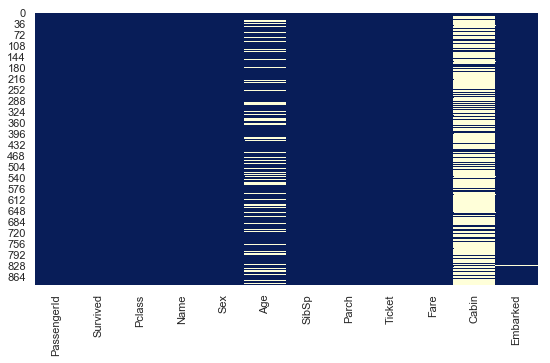

In [9]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df_train.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

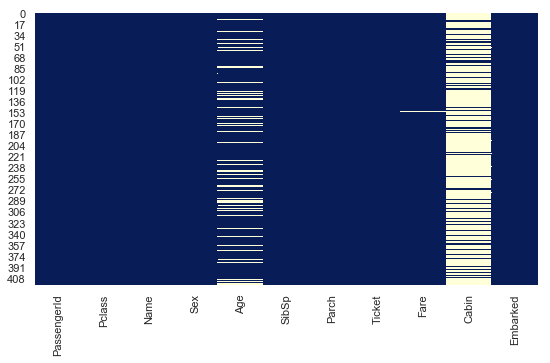

In [10]:


fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df_test.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


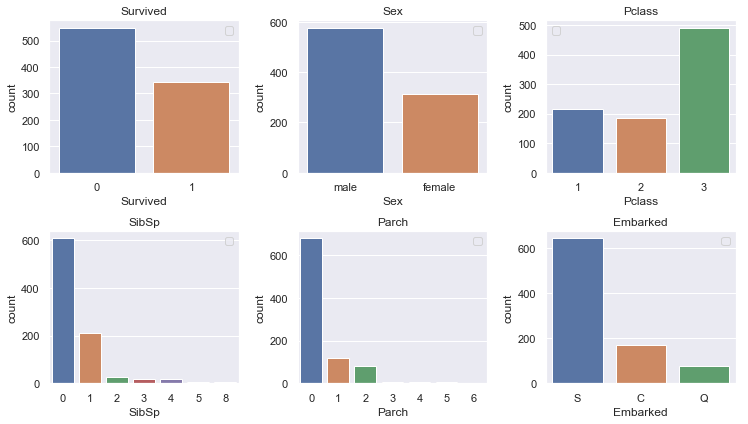

In [11]:
cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(df_train[cols[i]], ax=ax)
        ax.set_title(cols[i])
        ax.legend() 
        
plt.tight_layout()   

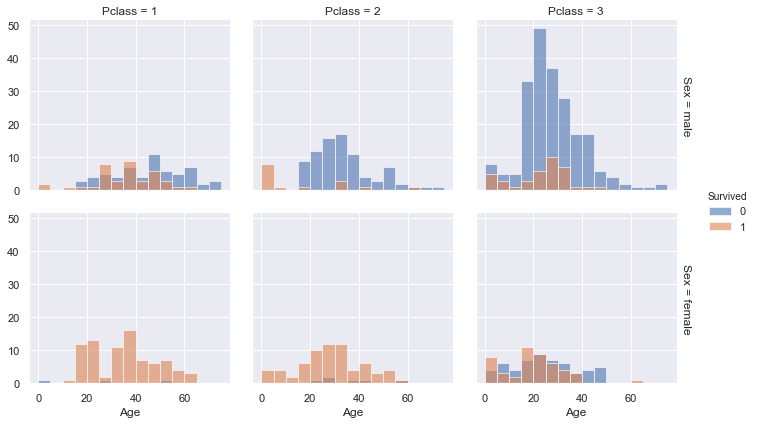

In [12]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show() 

In [13]:
df_train['Fare'].max()

512.3292

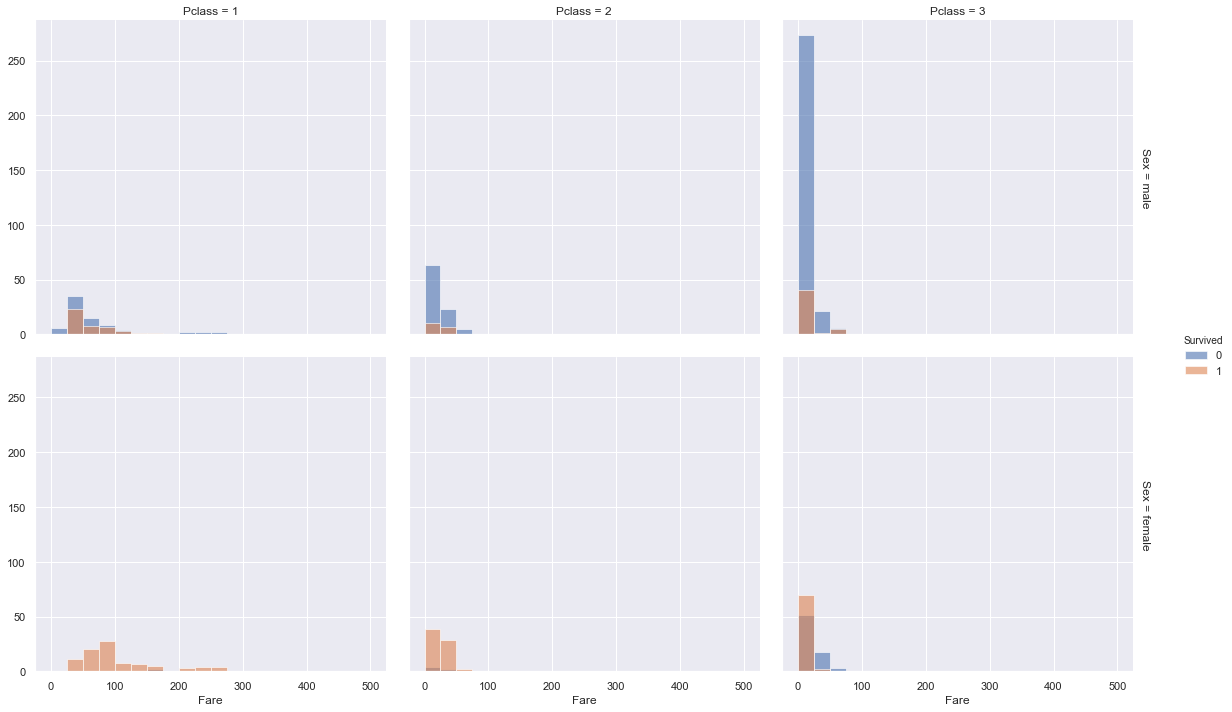

In [14]:
bins = np.arange(0, 520, 25)
g = sns.FacetGrid(df_train, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=5, aspect=1.1)
g.map(sns.distplot, 'Fare', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

C:\Users\uttam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


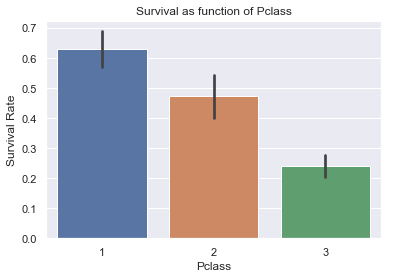

In [15]:
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

C:\Users\uttam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


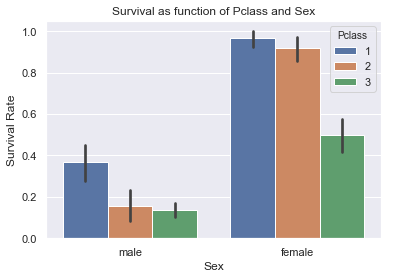

In [16]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

C:\Users\uttam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


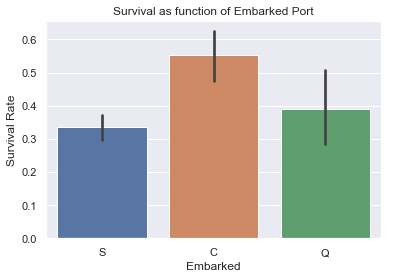

In [17]:
sns.barplot(x='Embarked', y='Survived', data=df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Embarked Port")
plt.show()

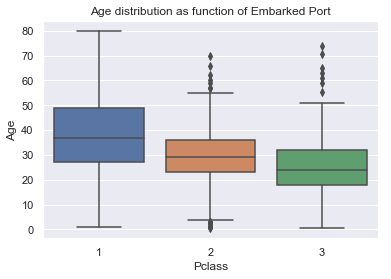

In [18]:
sns.boxplot(x='Pclass', y='Age', data=df_train)
plt.title("Age distribution as function of Embarked Port")
plt.show()

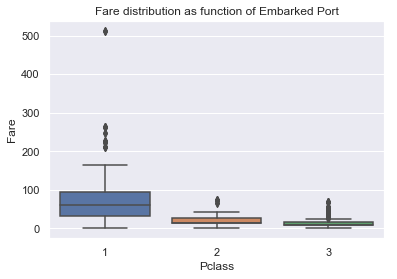

In [19]:
sns.boxplot(x='Pclass', y='Fare', data=df_train)
plt.title("Fare distribution as function of Embarked Port")
plt.show()

In [20]:
cm_surv = ["darkgrey" , "lightgreen"]

C:\Users\uttam\Anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


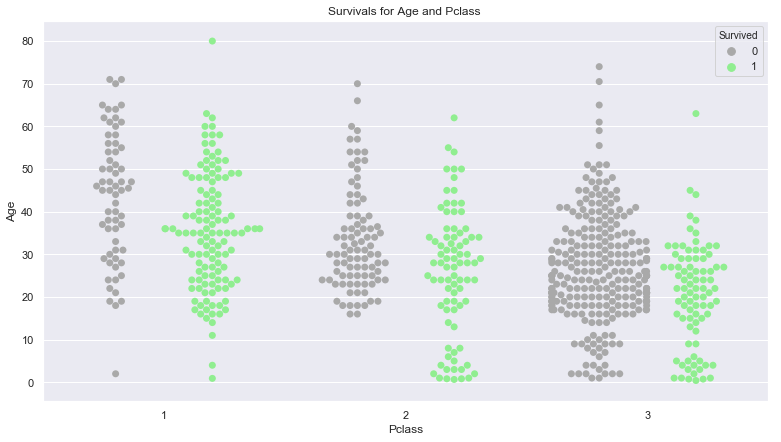

In [21]:
fig, ax = plt.subplots(figsize=(13,7))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', split=True, data=df_train , palette=cm_surv, size=7, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

C:\Users\uttam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


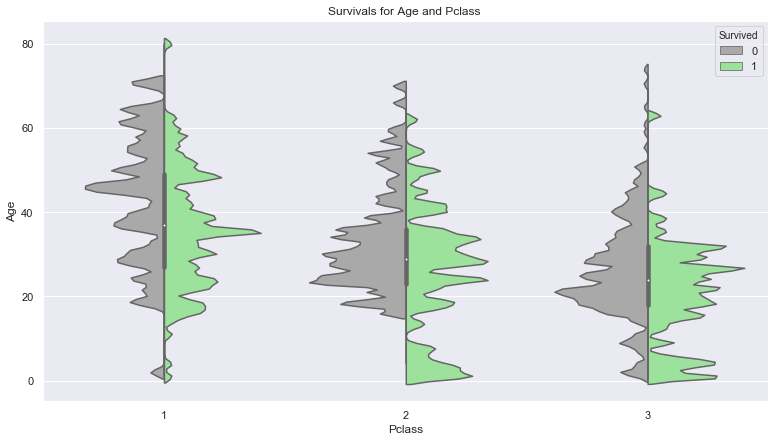

In [22]:
fig, ax = plt.subplots(figsize=(13,7))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=df_train, split=True, bw=0.05 , palette=cm_surv, ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

C:\Users\uttam\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\uttam\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\uttam\Anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


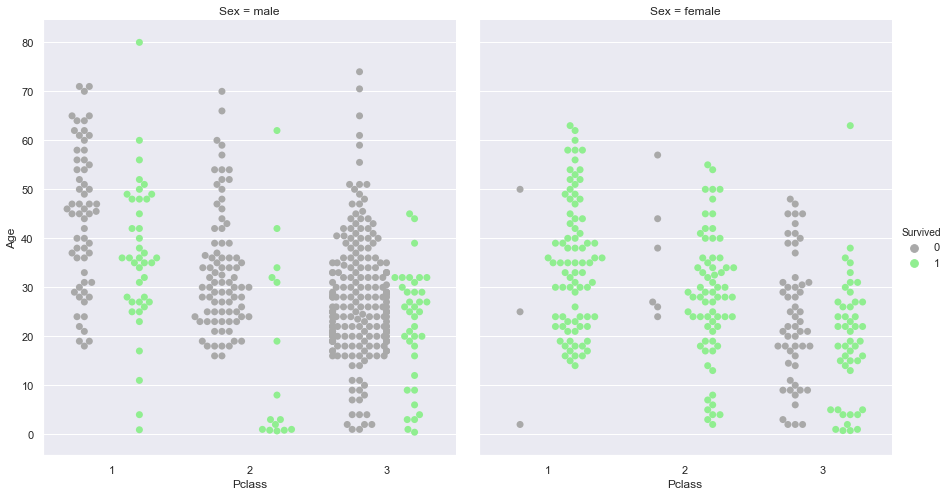

In [23]:
g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=df_train, kind="swarm", split=True, palette=cm_surv, size=7, aspect=.9, s=7)

C:\Users\uttam\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\uttam\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\uttam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


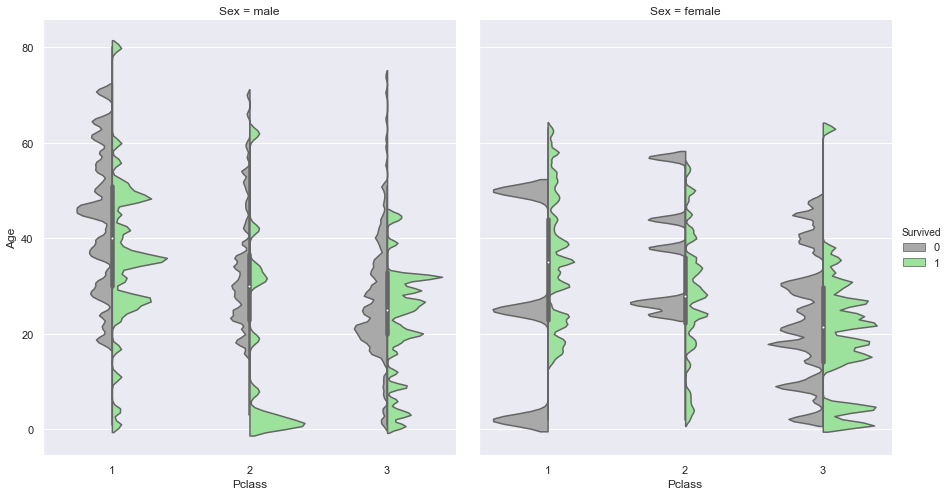

In [24]:
g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=df_train, kind="violin", split=True, bw=0.05, palette=cm_surv, size=7, aspect=.9, s=7)

In [25]:
for df in [df_train, df_test] :
    
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    df['Alone']=0
    df.loc[(df.FamilySize==0),'Alone'] = 1
    
    df['NameLen'] = df.Name.apply(lambda x : len(x)) 
    df['NameLenBin']=np.nan
    # Dividing the dataset into bins and counting the values in that bin
    for i in range(20,0,-1):
        df.loc[ df['NameLen'] <= i*5, 'NameLenBin'] = i
    
    
    df['Title']=0
    df['Title']=df.Name.str.extract(r'([A-Za-z]+)\.') #lets extract the Salutations
    df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [26]:
df_train['Name'][0]

'Braund, Mr. Owen Harris'

In [27]:
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [28]:
grps_namelenbin_survrate = df_train.groupby(['NameLenBin'])['Survived'].mean().to_frame()
grps_namelenbin_survrate

,Survived
NameLenBin,
3.0,0.227273
4.0,0.230769
5.0,0.325581
6.0,0.364929
7.0,0.522727
8.0,0.477273
9.0,0.800000
10.0,0.800000
11.0,0.812500


C:\Users\uttam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


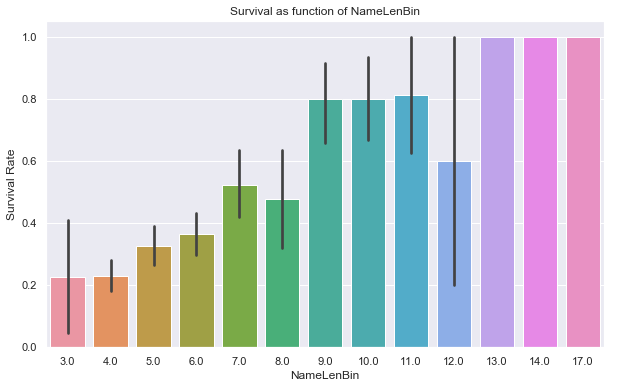

In [29]:
plt.subplots(figsize=(10,6))
sns.barplot(x='NameLenBin' , y='Survived' , data = df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of NameLenBin")
plt.show()

C:\Users\uttam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


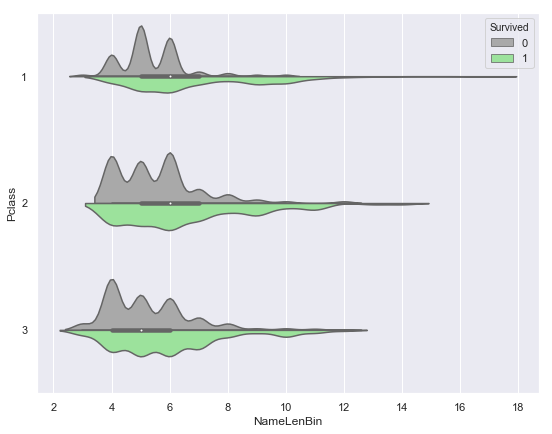

In [30]:
fig, ax = plt.subplots(figsize=(9,7))
sns.violinplot(x="NameLenBin", y="Pclass", data=df_train, hue='Survived', split=True, 
               orient="h", bw=0.2 , palette=cm_surv, ax=ax)
plt.show()

In [31]:
grps_title_survrate = df_train.groupby(['Title'])['Survived'].mean().to_frame()
grps_title_survrate

,Survived
Title,
Master,0.575000
Miss,0.704301
Mr,0.162571
Mrs,0.795276
Other,0.111111


In [32]:
master_title = df_train.where(df_train['Title'] == 'Master')

In [33]:
master_title['Age'].min()

0.42

C:\Users\uttam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


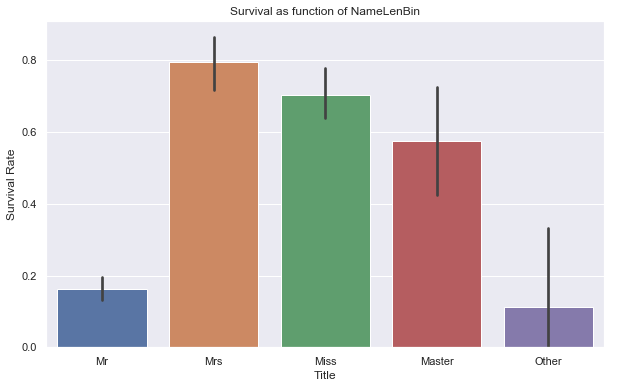

In [34]:
plt.subplots(figsize=(10,6))
sns.barplot(x='Title' , y='Survived' , data = df_train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of NameLenBin")
plt.show()

In [35]:
pd.crosstab(df_train.FamilySize,df_train.Survived).apply(lambda r: r/r.sum(), axis=1).style.background_gradient(cmap='summer_r')

C:\Users\uttam\Anaconda3\lib\importlib\_bootstrap_external.py:434: ImportWarning: Not importing directory C:\Users\uttam\Anaconda3\lib\site-packages\mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
C:\Users\uttam\Anaconda3\lib\importlib\_bootstrap_external.py:434: ImportWarning: Not importing directory c:\users\uttam\anaconda3\lib\site-packages\mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


Survived,0,1
FamilySize,,
0,0.696462,0.303538
1,0.447205,0.552795
2,0.421569,0.578431
3,0.275862,0.724138
4,0.8,0.2
5,0.863636,0.136364
6,0.666667,0.333333
7,1,0
10,1,0


In [36]:
fam_10_train = df.loc[df_train['FamilySize'] == 10]
fam_10_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,NameLen,NameLenBin,Title
159,1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.00,0,2,SOTON/O.Q. 3101315,13.7750,NaN,S,2,0,35,7.0,Mrs
180,1072,2,"McCrie, Mr. James Matthew",male,30.00,0,0,233478,13.0000,NaN,S,0,1,25,5.0,Mr
201,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S,2,0,39,8.0,Master
324,1216,1,"Kreuchen, Miss. Emilie",female,39.00,0,0,24160,211.3375,NaN,S,0,1,22,5.0,Miss


In [37]:
fam_10_test = df.loc[df_test['FamilySize'] == 10]
fam_10_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,NameLen,NameLenBin,Title
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,10,0,15,3.0,Miss
342,1234,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,10,0,21,5.0,Mr
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,10,0,27,6.0,Master
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S,10,0,30,6.0,Mrs


In [38]:
# Filling null values of Title with mode
# Filling null values of Age with mean
# Categorical are filled with mode
# Quantitative are filled with mean

for df in [df_train, df_test]:

    # Title
    df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])

    # Age: use Title to fill missing values
    df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age']= df.Age[df.Title=="Mr"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age']= df.Age[df.Title=="Mrs"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age']= df.Age[df.Title=="Master"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age']= df.Age[df.Title=="Miss"].mean()
    df.loc[(df.Age.isnull())&(df.Title=='Other'),'Age']= df.Age[df.Title=="Other"].mean()
    df = df.drop('Name', axis=1)

In [39]:
# Embarked
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0])
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode().iloc[0])

# Fare
df_train['Fare'] = df_train['Fare'].fillna(df_train['Fare'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())



In [40]:
# Bining for Age and Fare, convert Title to numerical

for df in [df_train, df_test]:
    
    df['Age_bin']=np.nan
    for i in range(8,0,-1):
        df.loc[ df['Age'] <= i*10, 'Age_bin'] = i
        
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i        
    
    # convert Title to numerical
    df['Title'] = df['Title'].map( {'Other':0, 'Mr': 1, 'Master':2, 'Miss': 3, 'Mrs': 4 } )
    # fill na with maximum frequency mode
    df['Title'] = df['Title'].fillna(df['Title'].mode().iloc[0])
    df['Title'] = df['Title'].astype(int)        



In [41]:
df_train_ml = df_train.copy()
df_test_ml = df_test.copy()

passenger_id = df_test_ml['PassengerId']

In [42]:
df_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
FamilySize     891 non-null int64
Alone          891 non-null int64
NameLen        891 non-null int64
NameLenBin     891 non-null float64
Title          891 non-null int32
Age_bin        891 non-null float64
Fare_bin       891 non-null float64
dtypes: float64(5), int32(1), int64(8), object(5)
memory usage: 128.9+ KB


In [43]:
df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
FamilySize     418 non-null int64
Alone          418 non-null int64
NameLen        418 non-null int64
NameLenBin     418 non-null float64
Title          418 non-null int32
Age_bin        418 non-null float64
Fare_bin       418 non-null float64
dtypes: float64(5), int32(1), int64(7), object(5)
memory usage: 57.2+ KB


In [44]:
# convert categorical to numerical : get_dummies

df_train_ml = pd.get_dummies(df_train_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
df_test_ml = pd.get_dummies(df_test_ml, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

df_train_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare_bin'],axis=1,inplace=True)
df_test_ml.drop(['PassengerId','Name','Ticket', 'Cabin', 'Age', 'Fare_bin'],axis=1,inplace=True)

In [45]:
pd.options.display.max_columns = 999
df_train_ml.head()

,Survived,SibSp,Parch,Fare,FamilySize,Alone,NameLen,NameLenBin,Title,Age_bin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,1,0,7.2500,1,0,23,5.0,1,3.0,1,0,1,0,1
1,1,1,0,71.2833,1,0,51,11.0,4,4.0,0,0,0,0,0
2,1,0,0,7.9250,0,1,22,5.0,3,3.0,0,0,1,0,1
3,1,1,0,53.1000,1,0,44,9.0,4,4.0,0,0,1,0,0
4,0,0,0,8.0500,0,1,24,5.0,1,4.0,1,0,1,0,1


In [46]:
# Check if columns or rows has null values
df_train_ml.isnull().values.any()

False

In [47]:
len(df_train_ml.columns)

15

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

C:\Users\uttam\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\uttam\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [49]:
# for df_train_ml
scaler.fit(df_train_ml.drop(['Survived'],axis=1))
scaled_features = scaler.transform(df_train_ml.drop(['Survived'],axis=1))
df_train_ml_sc = pd.DataFrame(scaled_features) # columns=df_train_ml.columns[1::])

In [50]:
len(df_train_ml_sc.columns)

14

In [51]:
# for df_test_ml
df_test_ml.fillna(df_test_ml.mean(), inplace=True)
#scaler.fit(df_test_ml)
scaled_features = scaler.transform(df_test_ml)
df_test_ml_sc = pd.DataFrame(scaled_features) # , columns=df_test_ml.columns)

In [52]:
X = df_train_ml.drop('Survived', axis=1)
y = df_train_ml['Survived']
X_test = df_test_ml

X_sc = df_train_ml_sc
y_sc = df_train_ml['Survived']
X_test_sc = df_test_ml_sc

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

C:\Users\uttam\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\uttam\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [54]:
svc = SVC(gamma = 0.01, C = 35)
scores_svc = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores_svc)
print(scores_svc.mean())

[0.78888889 0.75555556 0.76404494 0.83146067 0.78651685 0.80898876
 0.80898876 0.76404494 0.85393258 0.82954545]
0.7991967427079786


In [55]:
scores_svc_sc = cross_val_score(svc, X_sc, y_sc, cv=10, scoring='accuracy')
print(scores_svc_sc)
print(scores_svc_sc.mean())

[0.83333333 0.84444444 0.78651685 0.87640449 0.83146067 0.82022472
 0.82022472 0.76404494 0.86516854 0.86363636]
0.8305459085234366


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

dtree = DecisionTreeClassifier()

param_grid = {'min_samples_split': [2,4,7, 10, 15, 20, 25]}
dtree = GridSearchCV(dtree, param_grid, cv=10, refit=True, verbose=1)
dtree_grid = dtree.fit(X_sc,y_sc)

print(dtree_grid.best_score_)
print(dtree_grid.best_params_)
print(dtree_grid.best_estimator_)

# export_graphviz(dtree_grid, out_file='image.dot',  
#                 filled=True, rounded=True,
#                 special_characters=True)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
0.8047138047138047
{'min_samples_split': 25}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.3s finished


In [59]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus

# dot_data = StringIO()

# export_graphviz(dtree_grid, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [60]:
X_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.432793,-0.473674,-0.502445,0.059160,-1.231645,-0.427451,-0.422786,-0.744033,-0.363116,0.737695,-0.307562,0.615838,-0.510152,0.902587
1,0.432793,-0.473674,0.786845,0.059160,-1.231645,2.590962,2.751669,1.792701,0.385810,-1.355574,-0.307562,-1.623803,-0.510152,-1.107926
2,-0.474545,-0.473674,-0.488854,-0.560975,0.811922,-0.535252,-0.422786,0.947123,-0.363116,-1.355574,-0.307562,0.615838,-0.510152,0.902587
3,0.432793,-0.473674,0.420730,0.059160,-1.231645,1.836359,1.693517,1.792701,0.385810,-1.355574,-0.307562,0.615838,-0.510152,-1.107926
4,-0.474545,-0.473674,-0.486337,-0.560975,0.811922,-0.319651,-0.422786,-0.744033,0.385810,0.737695,-0.307562,0.615838,-0.510152,0.902587


In [61]:
rfc = RandomForestClassifier(max_depth=5, max_features=6)
scores_rfc = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.81111111 0.87777778 0.7752809  0.87640449 0.86516854 0.78651685
 0.82022472 0.75280899 0.88764045 0.82954545]
0.8282479287254567


In [62]:
rfc = RandomForestClassifier(max_depth=5, max_features=6)
scores_rfc = cross_val_score(rfc, X_sc, y_sc, cv=10, scoring='accuracy')
print(scores_rfc)
print(scores_rfc.mean())

[0.81111111 0.86666667 0.75280899 0.87640449 0.84269663 0.78651685
 0.83146067 0.78651685 0.87640449 0.81818182]
0.824876858472364


In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

model = SVC()
param_grid = {'C':uniform(0.1, 5000), 'gamma':uniform(0.0001, 1) }
rand_SVC = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=100)
rand_SVC.fit(X_sc,y_sc)
score_rand_SVC = get_best_score(rand_SVC)

0.813692480359147
{'C': 1254.4819032444807, 'gamma': 0.009427176851905982}
SVC(C=1254.4819032444807, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.009427176851905982,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [64]:
param_grid = {'C': [0.1,10, 100, 1000,5000], 'gamma': [1,0.1,0.01,0.001,0.0001,0.0000001], 'kernel': ['rbf']}
svc_grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True, verbose=1)
svc_grid.fit(X_sc,y_sc)
sc_svc = get_best_score(svc_grid)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
0.8316498316498316
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   36.6s finished


In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],  
              'min_samples_split': [3, 5, 6, 7]}

rf_grid = GridSearchCV(rfc, param_grid, cv=10, refit=True, verbose=1)
rf_grid.fit(X_sc,y_sc)
sc_rf = get_best_score(rf_grid)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
0.8372615039281706
{'max_depth': 7, 'max_features': 9, 'min_samples_split': 7}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   32.9s finished


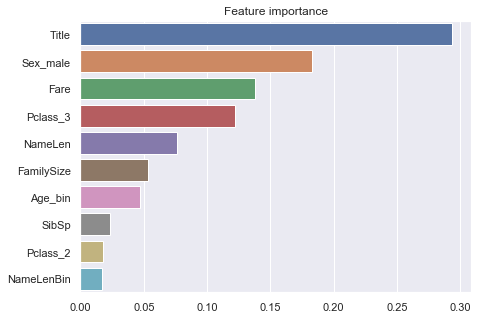

In [75]:
plot_feature_importances(rf_grid, X.columns)

In [76]:
pred_all_rf = rf_grid.predict(X_test_sc)

sub_rf = pd.DataFrame()
sub_rf['PassengerId'] = df_test['PassengerId']
sub_rf['Survived'] = pred_all_rf
sub_rf.to_csv('rf.csv',index=False)

In [79]:
print(rf_grid.best_estimator_.feature_importances_)

[0.02303017 0.0068043  0.13816914 0.05335043 0.00268061 0.07610293
 0.01700846 0.29377839 0.04680178 0.18309424 0.00559618 0.01334127
 0.0181925  0.1220496 ]


In [80]:
print(X.columns)

Index(['SibSp', 'Parch', 'Fare', 'FamilySize', 'Alone', 'NameLen',
       'NameLenBin', 'Title', 'Age_bin', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Pclass_2', 'Pclass_3'],
      dtype='object')


In [81]:
print(pred_all_rf)

[0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [97]:
gt = pd.read_csv('./input/gender_submission.csv')

In [100]:
gt_list = gt['Survived'].tolist()

In [101]:
print(gt_list)

[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [105]:
acc = 0

for our_result, gt_result in zip(pred_all_rf, gt_list):
    if our_result == gt_result:
        acc += 1

print('Accuracy percentage:',acc/len(pred_all_rf))

Accuracy percentage: 0.8708133971291866


In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier()

param_grid = {'n_estimators': [30, 50, 100], 
              'min_samples_split': [3, 4, 5, 6, 7, 8],
              'max_depth': [3, 4, 5, 6]}
gbdt_grid = GridSearchCV(gbdt, param_grid, cv=10, refit=True, verbose=1)
gbdt_grid.fit(X_sc,y_sc)
sc_gbdt = get_best_score(gbdt_grid)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
0.8395061728395061
{'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 50}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  1.6min finished
